# Promotional campaign



# Task-1

In [1]:
import pandas as pd
import numpy as np


In [2]:
df_campaign = pd.read_csv("datasets/dim_campaigns.csv")
df_product = pd.read_csv("datasets/dim_products.csv")
df_stores = pd.read_csv("datasets/dim_stores.csv")
df_events = pd.read_csv("datasets/fact_events.csv")

In [3]:
## Campaigns Name
df_campaign.head()

,campaign_id,campaign_name,start_date,end_date
0,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023
1,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024


In [4]:
df_campaign.shape

(2, 4)

In [5]:
## Product Details
df_product.head()

,product_code,product_name,category
0,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples
1,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
2,P03,Atliq_Suflower_Oil (1L),Grocery & Staples
3,P04,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
4,P05,Atliq_Scrub_Sponge_For_Dishwash,Home Care


In [6]:
## Store Details
df_stores.head()

,store_id,city
0,STTRV-0,Trivandrum
1,STMDU-3,Madurai
2,STHYD-6,Hyderabad
3,STVSK-1,Visakhapatnam
4,STCBE-3,Coimbatore


In [7]:
## Event Details
df_events.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272


In [8]:
print(df_campaign.shape)
print(df_product.shape)
print(df_stores.shape)
print(df_events.shape)

(2, 4)
(15, 3)
(50, 2)
(1510, 9)


In [9]:
merge_df = df_events.merge(df_campaign, on='campaign_id', how='left')
merge_df = merge_df.merge(df_product, on='product_code', how='left')
merge_df = merge_df.merge(df_stores, on='store_id', how='left')
merge_df.head()


,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),campaign_name,start_date,end_date,product_name,category,city
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Diwali,12-11-2023,18-11-2023,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Chennai
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Sankranti,10-01-2024,16-01-2024,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Chennai
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Diwali,12-11-2023,18-11-2023,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,Bengaluru
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Diwali,12-11-2023,18-11-2023,Atliq_Scrub_Sponge_For_Dishwash,Home Care,Bengaluru
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Sankranti,10-01-2024,16-01-2024,Atliq_Home_Essential_8_Product_Combo,Combo1,Hyderabad


In [10]:
merge_df.shape

(1510, 15)

In [11]:
merge_df.isna().sum()

event_id                        0
store_id                        0
campaign_id                     0
product_code                    0
base_price(before_promo)        0
quantity_sold(before_promo)    20
promo_type                      0
base_price(after_promo)         0
quantity_sold(after_promo)      0
campaign_name                   0
start_date                      0
end_date                        0
product_name                    0
category                        0
city                            0
dtype: int64

**1. The operations team wants to ensure the integrity of the events data by removing duplicates. Check for and remove duplicate rows in the events dataframe based on store_id, campaign_id, and product_code. How many duplicate rows were removed?**

In [12]:
duplicated_value = merge_df[merge_df.duplicated(subset=['store_id', 'campaign_id', 'product_code'])]
duplicated_value.shape

(10, 15)

**Duplicated values are `10`**

In [13]:
merge_df = merge_df.drop_duplicates(subset=['store_id', 'campaign_id', 'product_code'])
merge_df.shape

(1500, 15)

**2. How many cities have more than 5 stores?**

In [14]:
cities_store_count = merge_df.groupby('city')['store_id'].nunique()
cities_with_more_than_5 = cities_store_count[cities_store_count > 5]
print(cities_with_more_than_5)

city
Bengaluru    10
Chennai       8
Hyderabad     7
Name: store_id, dtype: int64


**There are `3` cities having more than 5 store**

**3. The sales team has identified missing values in the quantity_sold(before_promo)
data. Estimate these values using the median quantity sold before the promotion.
How many missing values were filled, and what is the median used for
imputation?**

In [15]:
# 1. Find median (ignores NaN automatically)
median_val = merge_df['quantity_sold(before_promo)'].median()
median_val

np.float64(78.0)

In [16]:
# 2. Count missing values
missing_count = merge_df['quantity_sold(before_promo)'].isna().sum()
missing_count

np.int64(20)

In [17]:
merge_df['quantity_sold(before_promo)'] = merge_df['quantity_sold(before_promo)'].fillna(median_val)

In [18]:

print(f"Median used for imputation: {median_val}")
print(f"Number of missing values filled: {missing_count}")

Median used for imputation: 78.0
Number of missing values filled: 20


In [19]:
merge_df_new = merge_df.copy()

**4. Identify the product category with the lowest base price before the promotion**

In [20]:
product_category_base_price = merge_df.groupby('category')['base_price(before_promo)'].sum()
product_category_low_base_price = product_category_base_price.idxmin()
print(f"Product category with the lowest base price before the promotion: {product_category_low_base_price}")

Product category with the lowest base price before the promotion: Personal Care


**5. What is the total quantity sold after the promotion for the BOGOF promo type
during the Diwali campaign?**

In [21]:
total_quantity_bogof_diwali = merge_df['quantity_sold(after_promo)'].where(
    (merge_df['promo_type'] == 'BOGOF') & (merge_df['campaign_name'] == 'Diwali'), 0).sum()
print(f"Total quantity sold after the promotion for BOGOF promo type during Diwali campaign: {total_quantity_bogof_diwali}")

Total quantity sold after the promotion for BOGOF promo type during Diwali campaign: 34461


**6. Which store recorded the highest quantity sold after the promotion during the
Diwali campaign?**

In [22]:
store_record_highest_qty_sold = merge_df.loc[merge_df['quantity_sold(after_promo)'][merge_df['campaign_name'] == 'Diwali'].idxmax()]
store_name = store_record_highest_qty_sold['store_id']
print(f"Store with the highest quantity sold after the promotion: {store_name}")

Store with the highest quantity sold after the promotion: STCHE-4


**7. Understand which campaigns had the most successful outcomes. Compare the
total quantities sold before and after the promotions for the Sankranti and Diwali
campaigns. Which campaign saw a greater increase in sales?**

In [23]:
total_qty_sold_before_promo_sankranti = merge_df[merge_df['campaign_name'] == 'Sankranti']['quantity_sold(before_promo)'].sum()
total_qty_sold_before_promo_diwali = merge_df[merge_df['campaign_name'] == 'Diwali']['quantity_sold(before_promo)'].sum()
total_qty_sold_after_promo_sankranti = merge_df[merge_df['campaign_name'] == 'Sankranti']['quantity_sold(after_promo)'].sum()
total_qty_sold_after_promo_diwali = merge_df[merge_df['campaign_name'] == 'Diwali']['quantity_sold(after_promo)'].sum()
increase_sankranti = total_qty_sold_after_promo_sankranti - total_qty_sold_before_promo_sankranti
increase_diwali = total_qty_sold_after_promo_diwali - total_qty_sold_before_promo_diwali
if increase_sankranti > increase_diwali:
    print("Sankranti campaign saw a greater increase in sales with increase of", increase_sankranti)
elif increase_diwali > increase_sankranti:
    print("Diwali campaign saw a greater increase in sales with increase of", increase_diwali)   

Sankranti campaign saw a greater increase in sales with increase of 154175.0


**8. Which product recorded the highest Incremental Revenue Percentage (IR%)
during the Sankranti campaign? What is the IR% for this product?**

step 1: Define Increamental Revenue(IR)

    IR = Revenue after promo - Revenue before promo
    where,
            Revenue before promo = base_price(before_promo) × quantity_sold(before_promo)
            Revenue after promo = base_price(after_promo) × quantity_sold(after_promo)

step 2: Define Incremental Revenue Percentage (IR%)
    IR% = (IR/Revenue before promo)*100

step 3. Filter data for Sankranti campaign.

step 4. Compute IR% per product

In [24]:
sankranti_df = merge_df[merge_df['campaign_name'] == 'Sankranti'].copy()
sankranti_df.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),campaign_name,start_date,end_date,product_name,category,city
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Sankranti,10-01-2024,16-01-2024,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Chennai
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Sankranti,10-01-2024,16-01-2024,Atliq_Home_Essential_8_Product_Combo,Combo1,Hyderabad
7,6.88E+10,STVJD-0,CAMP_SAN_01,P08,1190,22.0,BOGOF,595,88,Sankranti,10-01-2024,16-01-2024,Atliq_Double_Bedsheet_set,Home Care,Vijayawada
10,a7fecb,STBLR-1,CAMP_SAN_01,P03,200,361.0,BOGOF,100,963,Sankranti,10-01-2024,16-01-2024,Atliq_Suflower_Oil (1L),Grocery & Staples,Bengaluru
11,d04bc1,STCBE-0,CAMP_SAN_01,P09,90,49.0,25% OFF,67,46,Sankranti,10-01-2024,16-01-2024,Atliq_Body_Milk_Nourishing_Lotion (120ML),Personal Care,Coimbatore


In [25]:
# Calculate revenue before and after promotion
sankranti_df['revenue_before_promo'] = sankranti_df["base_price(before_promo)"] * sankranti_df['quantity_sold(before_promo)'] 
sankranti_df['revenue_after_promo'] = sankranti_df['base_price(after_promo)'] * sankranti_df['quantity_sold(after_promo)']

# Group by product_code to aggregate total revenue before and after promo
grouped_sankranti_revenue = sankranti_df.groupby('product_code').agg({
    'revenue_before_promo': 'sum',
    'revenue_after_promo': 'sum'
}).reset_index()


# Calculate IR% at the product level
grouped_sankranti_revenue['IR%'] = ((grouped_sankranti_revenue['revenue_after_promo'] - grouped_sankranti_revenue['revenue_before_promo']) / grouped_sankranti_revenue['revenue_before_promo']) * 100
grouped_sankranti_revenue['IR%'] = grouped_sankranti_revenue['IR%'].apply(lambda x: round(x, 2))

In [26]:
# Merge with df_products to get product names
grouped_sankranti_revenue_with_names = grouped_sankranti_revenue.merge(df_product, on='product_code')

#sort
grouped_sankranti_revenue_with_names = grouped_sankranti_revenue_with_names.sort_values(by='IR%', ascending=False)

In [27]:
grouped_sankranti_revenue_with_names[['IR%','product_name']][:1]

,IR%,product_name
2,91.83,Atliq_Suflower_Oil (1L)


**9. Which store in Visakhapatnam recorded the lowest Incremental Sold Units
Percentage (ISU%) during the Diwali campaign? What is the ISU% for that
store?**

In [28]:
diwali_df = merge_df[(merge_df['campaign_name'] == 'Diwali') & (merge_df['city'] == 'Visakhapatnam')].copy()
diwali_df.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),campaign_name,start_date,end_date,product_name,category,city
27,ba86f4,STVSK-1,CAMP_DIW_01,P13,350,61.0,BOGOF,175,204,Diwali,12-11-2023,18-11-2023,Atliq_High_Glo_15W_LED_Bulb,Home Appliances,Visakhapatnam
64,9779b0,STVSK-2,CAMP_DIW_01,P10,65,85.0,50% OFF,32,128,Diwali,12-11-2023,18-11-2023,Atliq_Cream_Beauty_Bathing_Soap (125GM),Personal Care,Visakhapatnam
88,85e08f,STVSK-4,CAMP_DIW_01,P08,1190,50.0,BOGOF,595,152,Diwali,12-11-2023,18-11-2023,Atliq_Double_Bedsheet_set,Home Care,Visakhapatnam
102,ffb109,STVSK-2,CAMP_DIW_01,P15,3000,204.0,500 Cashback,2500,589,Diwali,12-11-2023,18-11-2023,Atliq_Home_Essential_8_Product_Combo,Combo1,Visakhapatnam
108,a80b87,STVSK-0,CAMP_DIW_01,P11,190,49.0,50% OFF,95,76,Diwali,12-11-2023,18-11-2023,Atliq_Doodh_Kesar_Body_Lotion (200ML),Personal Care,Visakhapatnam


In [29]:
grouped = diwali_df.groupby('store_id').agg(
    total_quantity_sold_before_promo=('quantity_sold(before_promo)', 'sum'),
    total_quantity_sold_after_promo=('quantity_sold(after_promo)', 'sum')
).reset_index()

In [30]:
grouped['ISU%'] = ((grouped['total_quantity_sold_after_promo'] - grouped['total_quantity_sold_before_promo']) / grouped['total_quantity_sold_before_promo']) * 100
grouped['ISU%'] = grouped['ISU%'].apply(lambda x: round(x, 2))
grouped.loc[grouped['ISU%'].idxmin()]

store_id                            STVSK-3
total_quantity_sold_before_promo     1780.0
total_quantity_sold_after_promo        2656
ISU%                                  49.21
Name: 3, dtype: object

**10. Which promo type had both a negative Incremental Revenue Percentage (IR%)
and Incremental Sold Units Percentage (ISU%) during the Sankranti campaign?**

In [31]:
sankranti_df = merge_df[merge_df['campaign_name'] == 'Sankranti'].copy()
sankranti_df['revenue_before_promo'] = sankranti_df['base_price(before_promo)'] * sankranti_df['quantity_sold(before_promo)']
sankranti_df['revenue_after_promo'] = sankranti_df['base_price(after_promo)'] * sankranti_df['quantity_sold(after_promo)']

grouped_promo = sankranti_df.groupby('promo_type').agg({
    'revenue_before_promo': 'sum',
    'revenue_after_promo': 'sum',
    'quantity_sold(before_promo)': 'sum',
    'quantity_sold(after_promo)': 'sum'
}).reset_index()

# Incremental Revenue %
grouped_promo['IR%'] = ((grouped_promo['revenue_after_promo'] - grouped_promo['revenue_before_promo']) 
                        / grouped_promo['revenue_before_promo']) * 100

# Incremental Sold Units %
grouped_promo['ISU%'] = ((grouped_promo['quantity_sold(after_promo)'] - grouped_promo['quantity_sold(before_promo)']) 
                         / grouped_promo['quantity_sold(before_promo)']) * 100

# Round for clarity
grouped_promo['IR%'] = grouped_promo['IR%'].round(2)
grouped_promo['ISU%'] = grouped_promo['ISU%'].round(2)

negative_promo = grouped_promo[(grouped_promo['IR%'] < 0) & (grouped_promo['ISU%'] < 0)]

print(negative_promo[['promo_type', 'IR%', 'ISU%']])


  promo_type    IR%  ISU%
0    25% OFF -39.33 -19.6


# Task-2

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


**1. Visualize the number of stores in each city. Identify the city with the most stores
and explain the distribution of stores across other cities. How does the number of
stores in Bengaluru compare with those in Hyderabad and Chennai?
(Hint: Use a bar chart to visualize the number of stores by city)**

In [33]:
city_store_counts = merge_df_new.groupby('city')['store_id'].nunique().reset_index()
city_store_counts = city_store_counts.sort_values('store_id', ascending=False)
city_store_counts


,city,store_id
0,Bengaluru,10
1,Chennai,8
3,Hyderabad,7
2,Coimbatore,5
9,Visakhapatnam,5
4,Madurai,4
6,Mysuru,4
5,Mangalore,3
7,Trivandrum,2
8,Vijayawada,2


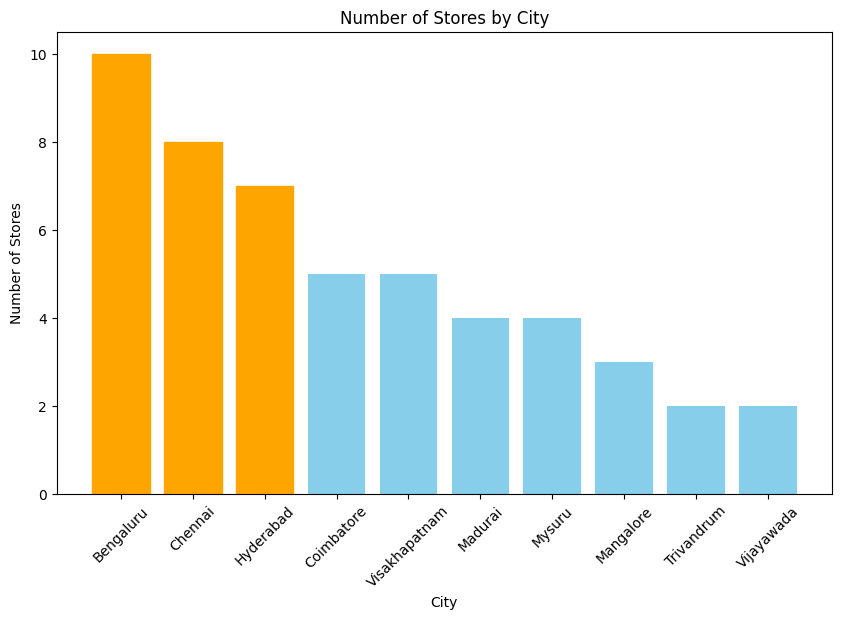

In [34]:


plt.figure(figsize=(10,6))
bars = plt.bar(city_store_counts['city'], city_store_counts['store_id'], color='skyblue')

# Highlight Bengaluru, Hyderabad, Chennai
highlight_cities = ['Bengaluru', 'Hyderabad', 'Chennai']
for i, city in enumerate(city_store_counts['city']):
    if city in highlight_cities:
        bars[i].set_color('orange')

plt.title("Number of Stores by City")
plt.xlabel("City")
plt.ylabel("Number of Stores")
plt.xticks(rotation=45)
plt.show()


**Number of Store Across Cities**

Insights:

- Bengaluru has the highest number of stores with 10 stores, followed by Chennai and Hyderabad having 8 and 7.
- Vijayawada and Trivandrum have the least number of stores with 2 in each.


**2. Analyze the total quantity sold after promotion for the Sankranti campaign across
different product categories. What percentage does each category contribute to
the overall sales, and what insights can be drawn from these contributions?
(Hint: Use a pie chart to visualize percentage contribution of each category to the overall sales)**

In [35]:
sankranti_df = merge_df_new[merge_df_new['campaign_name'] == 'Sankranti'].copy()
category_sales = sankranti_df.groupby('category')['quantity_sold(after_promo)'].sum().reset_index()
total_sales = category_sales['quantity_sold(after_promo)'].sum()
category_sales['percentage'] = (category_sales['quantity_sold(after_promo)'] / total_sales) * 100
category_sales['percentage'] = category_sales['percentage'].round(2)
category_sales = category_sales.sort_values('percentage', ascending=False)
category_sales
 

,category,quantity_sold(after_promo),percentage
1,Grocery & Staples,177724,70.51
2,Home Appliances,35610,14.13
3,Home Care,16894,6.70
0,Combo1,12411,4.92
4,Personal Care,9430,3.74


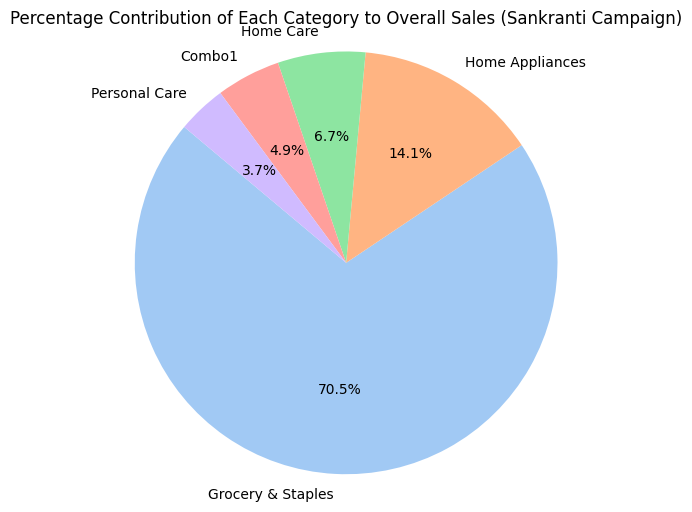

In [36]:
plt.figure(figsize=(6,6))
colors = sns.color_palette('pastel')[0:len(category_sales)]
plt.pie(category_sales['percentage'], labels=category_sales['category'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Percentage Contribution of Each Category to Overall Sales (Sankranti Campaign)")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show() 

**total quantity sold after promotion for the Sankranti campaign across
different product categories**

Insights:

The data reveals that sales were heavily dominated by one primary category, with others contributing significantly smaller shares.

* **Grocery & Staples:** This was the largest contributor by a wide margin, accounting for `70.5%` of total sales.
* **Home Appliances:** The second-largest category was `14.1%`.
* **Home Care:** This category contributed `6.7%`.
* **Combo1:** This category made up `4.9%` of sales.
* **Personal Care:** This was the smallest contributor, accounting for `3.7%` of the total sales.

**3. Examine the correlation between base price (after the promotion) and sales
quantities (after the promotion). What insights can be drawn regarding the
relationship between base price and sales quantities after the promotion?
(Hint: Use heatmap to get the correlation)**

In [37]:
sankranti_df = merge_df_new[merge_df_new['campaign_name'] == 'Sankranti'].copy()
corr_df = sankranti_df[['base_price(after_promo)', 'quantity_sold(after_promo)']]
corr_matrix = corr_df.corr()
corr_matrix


,base_price(after_promo),quantity_sold(after_promo)
base_price(after_promo),1.000000,-0.022748
quantity_sold(after_promo),-0.022748,1.000000


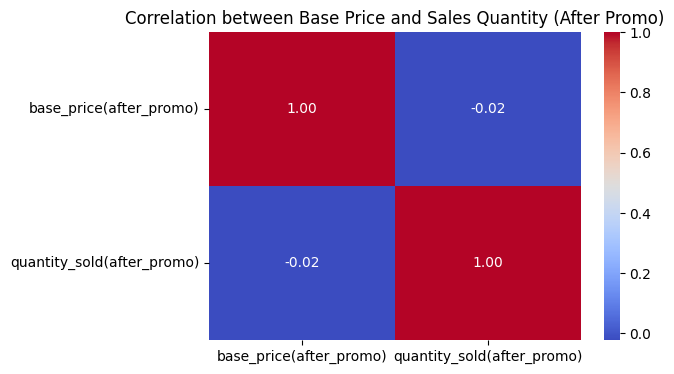

In [38]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Base Price and Sales Quantity (After Promo)")
plt.show()

Weak Negative Correlation (-0.02)
The correlation between base price and sales quantity after promotions is extremely weak at -0.02, which is essentially no meaningful relationship. This suggests that:

Key Insights:

Price-Demand Relationship is Disrupted: Typically, you'd expect a stronger negative correlation between price and quantity sold (higher prices = lower sales). The near-zero correlation indicates that after promotions, this traditional economic relationship is largely absent.
Promotion Effects Dominate: The promotional activities appear to be the primary driver of sales quantity, effectively masking or overriding the normal price sensitivity that customers would typically show.
Pricing Strategy Implications: Since base price has minimal correlation with post-promotion sales, this suggests that:

The promotion mechanism (discount amount, promotional strategy) is more influential than the underlying base price
Customers may be more focused on the perceived value of the deal rather than the absolute final price


Market Behavior: This pattern could indicate that customers in this market are highly promotion-responsive, meaning they're more likely to purchase based on the presence of a deal rather than the actual price point.

**5. Analyze the incremental sold units percentage (ISU%) across various cities.
Identify the city with the highest ISU% after the promotion and the city with the
smallest change. What trends can be observed about the effectiveness of
codebasics.io
promotions in driving sales across these cities?
(Hint: Use a line chart to visualize the ISU% comparison across cities)**

In [40]:
city_sales = merge_df_new.groupby('city').agg({
    'quantity_sold(before_promo)': 'sum',
    'quantity_sold(after_promo)': 'sum'
}).reset_index()
city_sales['ISU%'] = ((city_sales['quantity_sold(after_promo)'] - city_sales['quantity_sold(before_promo)']) /
                       city_sales['quantity_sold(before_promo)']) * 100
city_sales['ISU%'] = city_sales['ISU%'].round(2)
highest_city = city_sales.loc[city_sales['ISU%'].idxmax()]
smallest_city = city_sales.loc[city_sales['ISU%'].idxmin()]
print("Highest ISU%:", highest_city['city'], highest_city['ISU%'])
print("Smallest Change:", smallest_city['city'], smallest_city['ISU%'])


Highest ISU%: Madurai 121.28
Smallest Change: Visakhapatnam 99.07


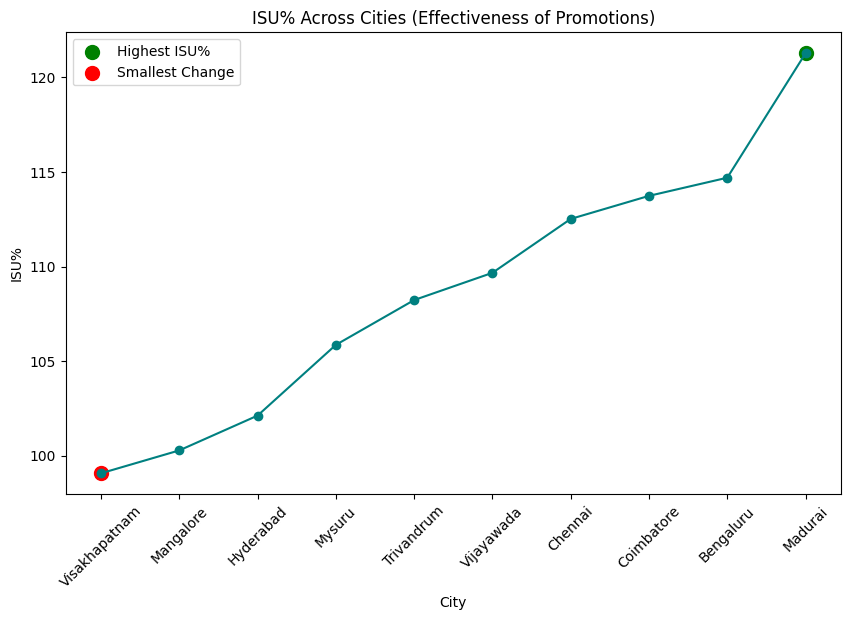

In [41]:
import matplotlib.pyplot as plt

# Sort by ISU% for trend clarity
city_sales = city_sales.sort_values('ISU%')

plt.figure(figsize=(10,6))
plt.plot(city_sales['city'], city_sales['ISU%'], marker='o', linestyle='-', color='teal')

# Highlight highest and smallest
plt.scatter(highest_city['city'], highest_city['ISU%'], color='green', s=100, label="Highest ISU%")
plt.scatter(smallest_city['city'], smallest_city['ISU%'], color='red', s=100, label="Smallest Change")

plt.title("ISU% Across Cities (Effectiveness of Promotions)")
plt.xlabel("City")
plt.ylabel("ISU%")
plt.xticks(rotation=45)
plt.legend()
plt.show()


Key Insights from ISU% Analysis:

Highest & Lowest Performers:

- Madurai shows the highest ISU% at ~121%, indicating promotions are most effective there
Visakhapatnam has the smallest change with ISU% near baseline (~99%), showing minimal promotional impact

Trends Observed:

- Strong Geographic Variation: ISU% ranges from ~99% to 121%, showing significant differences in promotional effectiveness across cities
- Generally Positive Response: Most cities show ISU% above 100%, indicating promotions are driving incremental sales across markets
- Tier-2/Tier-3 Cities Outperform: Cities like Madurai, Bengaluru, and Coimbatore show higher ISU%, suggesting smaller markets may be more promotion-responsive than metro areas
- Metro Market Saturation: Cities like Visakhapatnam show lower promotional lift, potentially indicating market saturation or higher baseline competition

**6. Analyze the relationship between incremental revenue and incremental sold units
for different promotion types in Hyderabad. Which promotion type led to the
highest incremental sold units, and which one generated the highest incremental
revenue? What insights can you draw from the balance between the two metrics
for this city?
(Hint: Use a scatter plot to analyze the relationship)**

In [42]:
hyd_df = merge_df_new[merge_df_new['city'] == 'Hyderabad'].copy()
hyd_df['revenue_before'] = hyd_df['base_price(before_promo)'] * hyd_df['quantity_sold(before_promo)']
hyd_df['revenue_after'] = hyd_df['base_price(after_promo)'] * hyd_df['quantity_sold(after_promo)']
promo_summary = hyd_df.groupby('promo_type').agg({
    'revenue_before': 'sum',
    'revenue_after': 'sum',
    'quantity_sold(before_promo)': 'sum',
    'quantity_sold(after_promo)': 'sum'
}).reset_index()
promo_summary['IR%'] = ((promo_summary['revenue_after'] - promo_summary['revenue_before']) / promo_summary['revenue_before']) * 100
promo_summary['ISU%'] = ((promo_summary['quantity_sold(after_promo)'] - promo_summary['quantity_sold(before_promo)']) / promo_summary['quantity_sold(before_promo)']) * 100

promo_summary[['IR%', 'ISU%']] = promo_summary[['IR%', 'ISU%']].round(2)





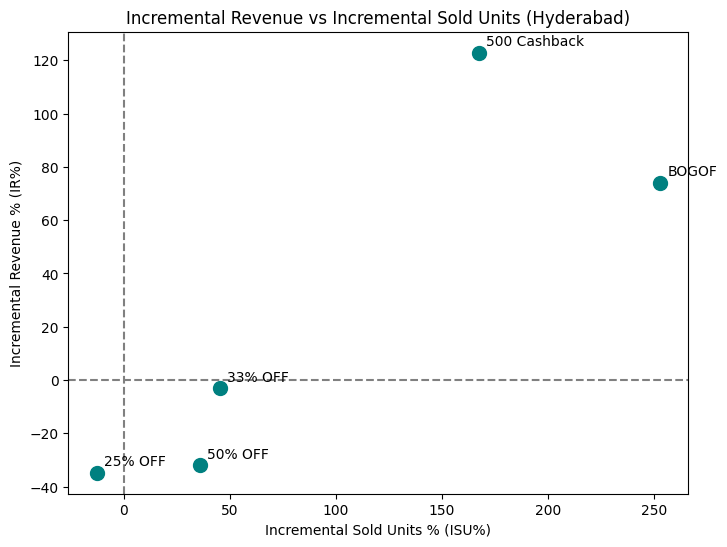

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(promo_summary['ISU%'], promo_summary['IR%'], color='teal', s=100)

# Annotate promo types
for i, txt in enumerate(promo_summary['promo_type']):
    plt.annotate(txt, (promo_summary['ISU%'][i], promo_summary['IR%'][i]), xytext=(5,5), textcoords='offset points')

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

plt.title("Incremental Revenue vs Incremental Sold Units (Hyderabad)")
plt.xlabel("Incremental Sold Units % (ISU%)")
plt.ylabel("Incremental Revenue % (IR%)")
plt.show()


Key Findings from Hyderabad Analysis:
**Highest Performers:**

- Highest Incremental Sold Units: 500 Cashback (~175% ISU%)
- Highest Incremental Revenue: 500 Cashback (~122% IR%)

**Performance by Promotion Type:**

- 500 Cashback: Best overall performance (high units + high revenue)
- BOGOF: Moderate performance (~250% units, ~75% revenue)
- 33% OFF: Break-even point (positive units, minimal revenue impact)
- 25% OFF & 50% OFF: Negative performance (revenue loss despite some unit gains)

Key Insights:

- Cashback Dominates: 500 Cashback is the clear winner, driving both volume and revenue effectively
- Discount Dilemma: Percentage-based discounts (25%, 33%, 50% OFF) show diminishing returns - higher discounts don't necessarily drive proportional revenue gains
- BOGOF Sweet Spot: Buy-one-get-one-free generates strong unit movement but moderate revenue, suggesting good customer acquisition potential
- Revenue-Volume Trade-off: Deep discounts increase units but hurt revenue, while cashback maintains profitability while driving sales

**Recommendation:** Focus on cashback promotions in Hyderabad for optimal balance of volume and revenue growth.

**7. Analyze the revenue before and after promotions across different product
categories in Bengaluru. What trends can be identified in the performance of
each category, and how did promotions impact overall revenue in the city?
(Hint: Use a vertical bar chart to compare the revenue before and after promotions)**

In [45]:
blr_df = merge_df_new[merge_df_new['city'] == 'Bengaluru'].copy()

blr_df['revenue_before'] = blr_df['base_price(before_promo)'] * blr_df['quantity_sold(before_promo)']
blr_df['revenue_after'] = blr_df['base_price(after_promo)'] * blr_df['quantity_sold(after_promo)']

category_revenue = blr_df.groupby('category').agg({
    'revenue_before': 'sum',
    'revenue_after': 'sum'
}).reset_index()


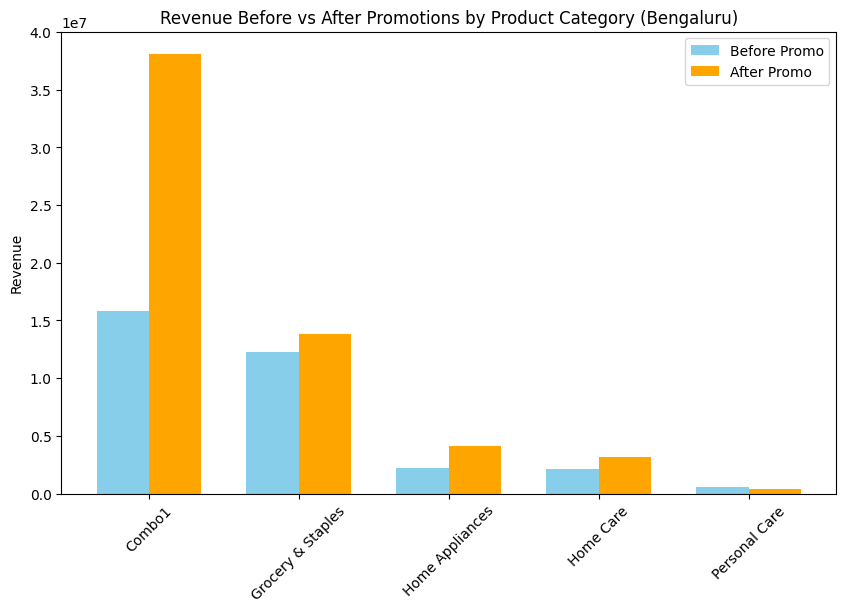

In [47]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(category_revenue['category']))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, category_revenue['revenue_before'], width, label='Before Promo', color='skyblue')
plt.bar(x + width/2, category_revenue['revenue_after'], width, label='After Promo', color='orange')

plt.xticks(x, category_revenue['category'], rotation=45)
plt.ylabel("Revenue")
plt.title("Revenue Before vs After Promotions by Product Category (Bengaluru)")
plt.legend()
plt.show()


*Bengaluru Revenue Analysis Summary:*
Top Performers:

- Combo: Explosive 137% growth (₹16M → ₹38M)
- Home Appliances: Strong 68% increase (₹2.5M → ₹4.2M)

*Moderate Growth:*

- Grocery & Staples: 10% rise (₹12.5M → ₹13.8M)
- Home Care: 45% increase (₹2.2M → ₹3.2M)

*Laggard:*

- Personal Care: Minimal impact (~₹0.5M)

*Key Takeaway:* Promotions drove overall revenue growth in Bengaluru, with bundle/combo products showing exceptional results. Category-specific promotional strategies needed for underperforming segments like Personal Care.